In [2]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread("/home/ubuntu/workspace/boxs.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

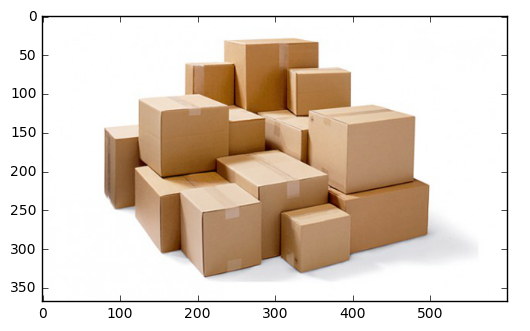

In [3]:
plt.imshow(imgRGB)
plt.show()

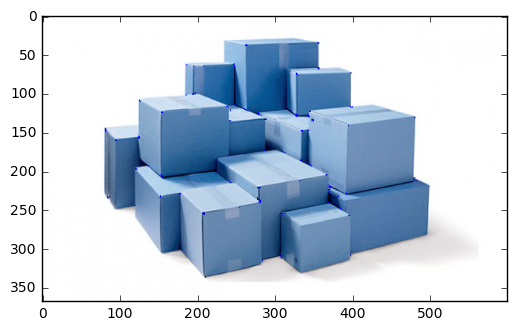

In [4]:
# Harris corners detector

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.05)
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.show()

[[[342 129]]

 [[120 197]]

 [[195 100]]

 [[334 149]]

 [[134 192]]

 [[354  36]]

 [[279 237]]

 [[279 221]]

 [[354  67]]

 [[286 134]]]
342 129
120 197
195 100
334 149
134 192
354 36
279 237
279 221
354 67
286 134


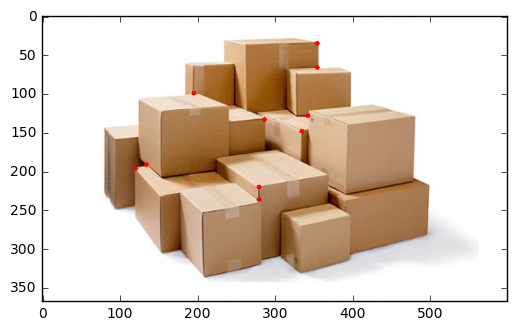

(<matplotlib.image.AxesImage at 0x7fce3f74bf28>, None)

In [5]:
# Shi-Tomasi Corner Detector
# detects 25 strongest corners, 0.01 - minimum quality of corner below which everyone is rejected
# 10 - minimum euclidean distance between corners detected

gray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,10,0.01,10)
corners = np.int0(corners)
print(corners)

for i in corners:
    x,y = i.ravel()
    print(x,y)
    cv2.circle(imgRGB,(x,y),3,255,-1)
    
plt.imshow(imgRGB),plt.show()

In [6]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) #250+10=260 -> 255
print(x+y) #250+10=260 -> 260 % 256 = 4

[[255]]
[4]


In [7]:
img1 = cv2.imread('/home/ubuntu/workspace/boxs.jpg')
img2 = cv2.imread('/home/ubuntu/workspace/rsp.jpg')

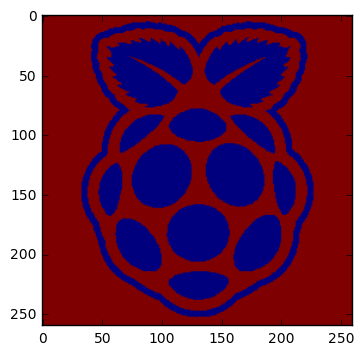

(<matplotlib.image.AxesImage at 0x7fce3dad3278>, None)

In [8]:
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols] #region of interest

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 80, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv),plt.show()

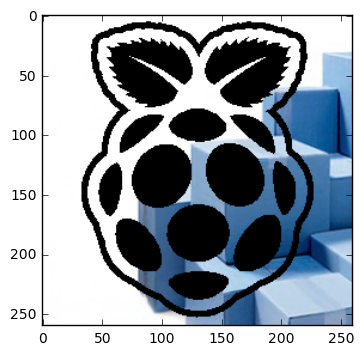

(<matplotlib.image.AxesImage at 0x7fce3f6e59b0>, None)

In [9]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg),plt.show()

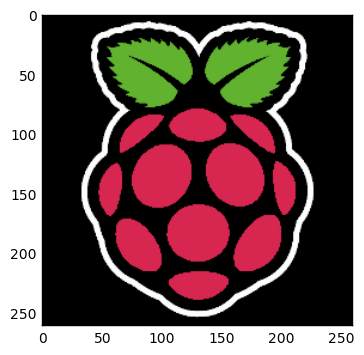

(<matplotlib.image.AxesImage at 0x7fce3f64e198>, None)

In [10]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(cv2.cvtColor(img2_fg,cv2.COLOR_BGR2RGB)),plt.show()

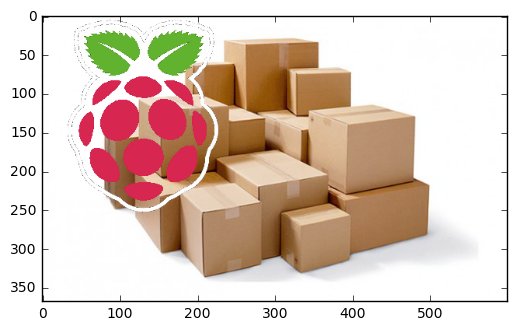

(<matplotlib.image.AxesImage at 0x7fce3dbd31d0>, None)

In [11]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)),plt.show()

In [10]:
face_cascade = cv2.CascadeClassifier('/home/ubuntu/miniconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/home/ubuntu/miniconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_eye.xml')

In [20]:
img = cv2.imread('/home/ubuntu/workspace/family.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [22]:
print(faces)

[[386 136 233 233]
 [616 178 269 269]
 [894 399 196 196]
 [204 415 247 247]]


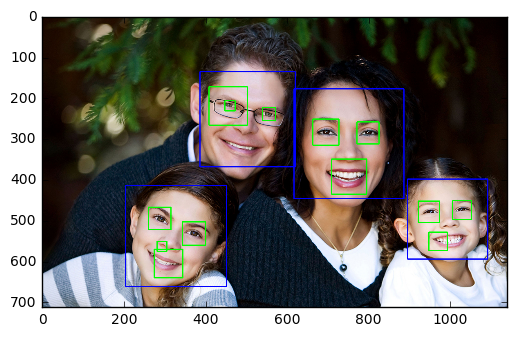

In [23]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()